# Predict successful rate of Bike-share Cyclistic project


## 👉 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Ignore warning

pd.set_option('float_format', '{:2f}'.format) # Show full number instead of show number like "1.5e2"

## 👉 The Data

In [3]:
df = pd.read_csv('Data\\Qtr1-divvy-tripdata.csv')

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,21/01/2023 20:05,21/01/2023 20:16,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,10/01/2023 15:37,10/01/2023 15:46,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,02/01/2023 07:51,02/01/2023 08:05,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,22/01/2023 10:52,22/01/2023 11:01,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,12/01/2023 13:58,12/01/2023 14:13,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


## 👉 Data Cleaning

### Missing data

In [5]:
df.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    88104
start_station_id      88236
end_station_name      93016
end_station_id        93157
start_lat                 0
start_lng                 0
end_lat                 426
end_lng                 426
member_casual             0
dtype: int64

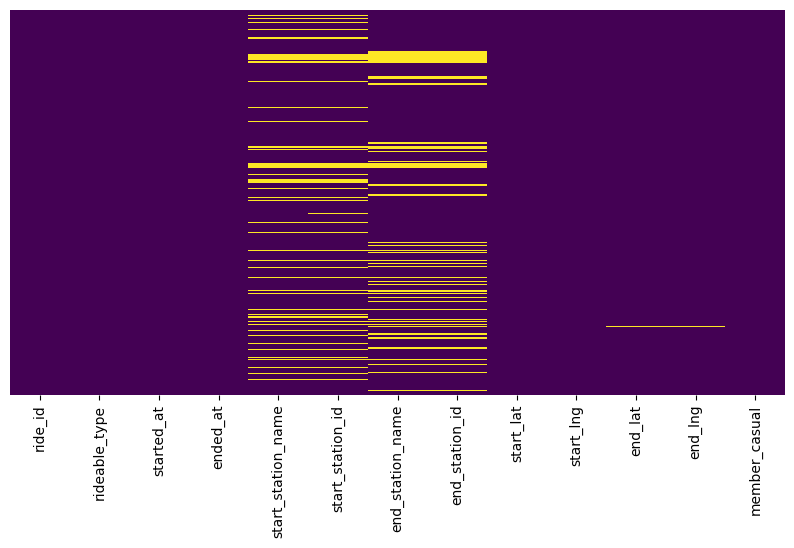

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Remove null data of start_station_id

In [7]:
df = df.dropna(subset=['start_station_id'])

In [8]:
df.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        0
start_station_id          0
end_station_name      52771
end_station_id        52897
start_lat                 0
start_lng                 0
end_lat                 426
end_lng                 426
member_casual             0
dtype: int64

### Fill end_lat and end_lng attributes

In [9]:
med_end_lat = df['end_lat'].median()
med_end_lng = df['end_lng'].median()
med_end_lat,med_end_lng

(41.89434514, -87.643118)

In [10]:
df.loc[df['end_lat'].isnull(),'end_lat'] = med_end_lat
df.loc[df['end_lng'].isnull(),'end_lng'] = med_end_lng

In [11]:
df.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        0
start_station_id          0
end_station_name      52771
end_station_id        52897
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
dtype: int64

## Pre-processing data

### Transforming categorical data

In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,21/01/2023 20:05,21/01/2023 20:16,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,10/01/2023 15:37,10/01/2023 15:46,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,02/01/2023 07:51,02/01/2023 08:05,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,22/01/2023 10:52,22/01/2023 11:01,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,12/01/2023 13:58,12/01/2023 14:13,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [13]:
df['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [14]:
#Field 'rideable_type': assinging classic_bike: 0, electric_bike: 1, docked_bike: 2
df.loc[df['rideable_type'] == 'classic_bike', 'rideable_type'] = 0
df.loc[df['rideable_type'] == 'electric_bike', 'rideable_type'] = 1
df.loc[df['rideable_type'] == 'docked_bike', 'rideable_type'] = 2

In [15]:
#Field 'member_casual': assinging member: 1, casual: 0
df.loc[df['member_casual'] == 'member', 'member_casual'] = 1
df.loc[df['member_casual'] == 'casual', 'member_casual'] = 0

### Drop unnecessary columns

In [16]:
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,1,21/01/2023 20:05,21/01/2023 20:16,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480,41.924074,-87.646278,41.930000,-87.640000,1


In [17]:
df2 = df.drop(columns=['ride_id','started_at','ended_at','start_station_name','start_station_id','end_station_name','end_station_id'])

In [18]:
df2.head()

,rideable_type,start_lat,start_lng,end_lat,end_lng,member_casual
0,1,41.924074,-87.646278,41.930000,-87.640000,1
1,0,41.799568,-87.594747,41.809835,-87.599383,1
2,1,42.008571,-87.690483,42.039742,-87.699413,0
3,0,41.799568,-87.594747,41.809835,-87.599383,1
4,0,41.799568,-87.594747,41.809835,-87.599383,1


In [19]:
#convert rideable_type and member_casual
df2['rideable_type'] = df['rideable_type'].astype(int)
df2['member_casual'] = df['member_casual'].astype(int)

In [20]:
df2.describe()

,rideable_type,start_lat,start_lng,end_lat,end_lng,member_casual
count,551188.000000,551188.000000,551188.000000,551188.000000,551188.000000,551188.000000
mean,0.491564,41.897675,-87.645984,41.897979,-87.646353,0.776800
std,0.524555,0.045581,0.025987,0.045747,0.026266,0.416392
min,0.000000,41.648501,-87.830000,41.648501,-87.840000,0.000000
25%,0.000000,41.878350,-87.658971,41.879255,-87.660000,1.000000
50%,0.000000,41.894306,-87.642984,41.894345,-87.643118,1.000000
75%,1.000000,41.924841,-87.629764,41.925566,-87.630000,1.000000
max,2.000000,42.064854,-87.528232,42.080000,-87.528232,1.000000


## 👉 Using SMOTE OVERSAMPLING technique

In [21]:
df2['member_casual'].value_counts()

1    428163
0    123025
Name: member_casual, dtype: int64

In [22]:
X = df2.drop(columns='member_casual')
y = df2['member_casual']

In [59]:
from imblearn.over_sampling import SMOTE

In [97]:
# X và y là các feature và label của dữ liệu
smote = SMOTE(k_neighbors = 5, random_state=96)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [98]:
X_resampled.shape, y_resampled.shape

((856326, 5), (856326,))

## 👉 Building a Logistic Regression model

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.3, 
                                                    random_state=101,
                                                    stratify = y_resampled)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((599428, 5), (599428,), (256898, 5), (256898,))

In [101]:
# X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='member_casual'), 
#                                                     df2['member_casual'], 
#                                                     test_size=0.2, 
#                                                     random_state=101)

# X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Training and Predicting

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
logreg1 = LogisticRegression()
logreg1.fit(X_train,y_train)

LogisticRegression()

In [104]:
# make prediction and return result as label:
y_train_pred = logreg1.predict(X_train)
y_test_pred = logreg1.predict(X_test)

# Make prediction and return result as probability:
y_train_pred_prop = logreg1.predict_proba(X_train)
y_test_pred_prop = logreg1.predict_proba(X_test)

In [105]:
# Let's take a look in our results:
print('Result of ".predict(X_train)":', y_train_pred[:5], sep = '\n')
print('=='*30)
print('Result of ".predict_proba(X_train)":', y_train_pred_prop[:5], sep = '\n')


Result of ".predict(X_train)":
[1 0 0 1 0]
Result of ".predict_proba(X_train)":
[[0.39981802 0.60018198]
 [0.57968862 0.42031138]
 [0.59457329 0.40542671]
 [0.40753054 0.59246946]
 [0.58608576 0.41391424]]


### Change threshold

In [106]:
y_train_pred2 = (y_train_pred_prop>=0.5).astype('int')[:, 1]
y_train_pred2[:5]

array([1, 0, 0, 1, 0])

## 👉 Model Evaluation Metrics:

In [107]:
# Import evaluation metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

###  Accuracy metrics

In [108]:
# Accuracy on trainset:
accuracy_score(y_train, y_train_pred)

0.5792622299925929

In [109]:
# Accuracy on testset:
accuracy_score(y_test, y_test_pred)

0.580039548770329

###  Confusion Matrix

In [110]:
# Calculating non-normalized confustion matrix on Testset:
confusion_matrix(y_test, y_test_pred)

array([[77475, 50974],
       [56913, 71536]], dtype=int64)

In [111]:
# Normalized confustion matrix on Testset
confusion_matrix(y_test, y_test_pred, normalize='true')


array([[0.60315767, 0.39684233],
       [0.44307858, 0.55692142]])

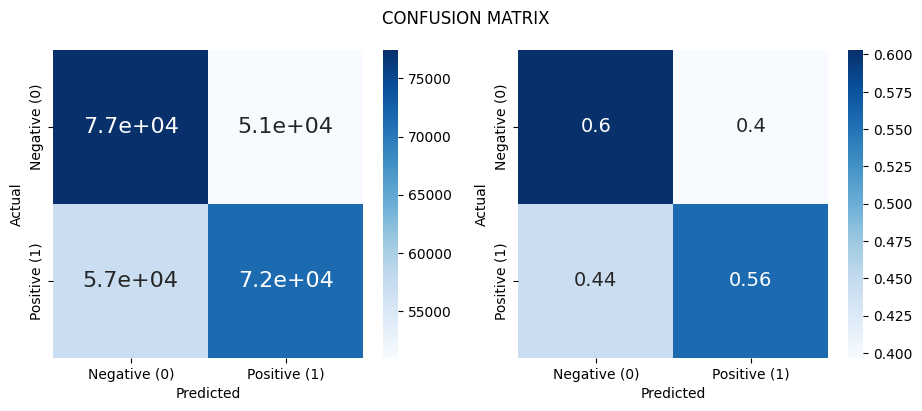

In [112]:
plt.figure(figsize = (11, 4))
plt.subplot(121)
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

plt.subplot(122)
conf_matrix_norm = confusion_matrix(y_test, y_test_pred, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})
plt.suptitle('CONFUSION MATRIX')
plt.show()

In [113]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59    128449
           1       0.58      0.56      0.57    128449

    accuracy                           0.58    256898
   macro avg       0.58      0.58      0.58    256898
weighted avg       0.58      0.58      0.58    256898



## 👉 Predict example

In [114]:
# Predict Sales when company pay
#step1: create input:
ip_arr = np.array([[1,42,-87.6,42,-87.6]])
#step2: predict!
logreg1.predict(ip_arr)

array([0])